In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [2]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [3]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

In [4]:
# model definition

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [5]:
model = LogisticRegression()
optimizer = optim.SGD(model.parameters(), lr=1)

costdata = []

In [6]:
nb_epochs = 100

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # load train data
        x_train, y_train = samples
        
        # H(x)
        hypothesis = model(x_train)
        
        # cost
        cost = F.binary_cross_entropy(hypothesis, y_train)
        costdata.append([epoch, float(cost)])

        # backward
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch % 10 == 0:
            prediction = hypothesis >= torch.FloatTensor([0.5]) # True (>= 0.5)
            correct_prediction = prediction.float() == y_train # True (co_pred == pred)
            accuracy = correct_prediction.sum().item() / len(correct_prediction) # calculate accuracy
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
                epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item(), accuracy * 100,
            ))

Epoch    0/100 Batch 1/2 Cost: 0.749440 Accuracy 60.00%
Epoch    0/100 Batch 2/2 Cost: 0.004569 Accuracy 100.00%
Epoch   10/100 Batch 1/2 Cost: 1.358807 Accuracy 60.00%
Epoch   10/100 Batch 2/2 Cost: 4.863988 Accuracy 0.00%
Epoch   20/100 Batch 1/2 Cost: 1.050102 Accuracy 60.00%
Epoch   20/100 Batch 2/2 Cost: 0.083915 Accuracy 100.00%
Epoch   30/100 Batch 1/2 Cost: 0.923659 Accuracy 80.00%
Epoch   30/100 Batch 2/2 Cost: 0.001058 Accuracy 100.00%
Epoch   40/100 Batch 1/2 Cost: 0.518252 Accuracy 80.00%
Epoch   40/100 Batch 2/2 Cost: 0.006218 Accuracy 100.00%
Epoch   50/100 Batch 1/2 Cost: 0.168575 Accuracy 100.00%
Epoch   50/100 Batch 2/2 Cost: 0.007401 Accuracy 100.00%
Epoch   60/100 Batch 1/2 Cost: 0.044894 Accuracy 100.00%
Epoch   60/100 Batch 2/2 Cost: 0.433477 Accuracy 100.00%
Epoch   70/100 Batch 1/2 Cost: 0.354316 Accuracy 80.00%
Epoch   70/100 Batch 2/2 Cost: 0.002266 Accuracy 100.00%
Epoch   80/100 Batch 1/2 Cost: 0.088529 Accuracy 100.00%
Epoch   80/100 Batch 2/2 Cost: 0.012324

In [7]:
print(model(torch.FloatTensor([2, 1])))

tensor([0.0037], grad_fn=<SigmoidBackward0>)


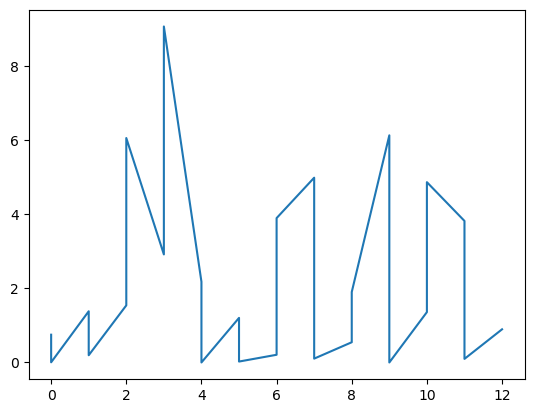

In [8]:
# gradient for epoch 1 ~ 26

plt.plot(np.transpose(costdata)[0][:25], np.transpose(costdata)[1][:25], '-')